In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import metrics_summary as ms

In [8]:
np.random.seed(170)

In [9]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").values.ravel()
y_test = pd.read_csv("data/y_test.csv").values.ravel()

## SMOTE

In [10]:
# implement SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_os, y_os = os.fit_resample(X_train, y_train)
print(X_os.shape, y_os.shape)

(236866, 53) (236866,)


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf, X_train, y_train)

[[49945   750]
 [   34  6008]]
Kappa Score: 0.9309899421804859
Accuracy Score: 0.9861818566367626
Precision: 0.8890204202426754
Recall: 0.9943727242634889
F1 Score: 0.93875
AUC Score: 0.9897891829227495
Average Accuracy Score: 0.9857386688199379
Average Precision Score: 0.8833676481929059
Average Recall Score: 0.9962733003805113
Average F1 Score: 0.9857386688199379
Average AUC Score: 0.994945558474105


0.994945558474105

In [12]:
# probs = rf.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)

# # method I: plt
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'Random Forest = %0.4f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

NameError: name 'roc_curve' is not defined

#### Random Forest Using Cost-Sensitive Learning

In [14]:
rf_cs = RandomForestClassifier(class_weight="balanced")
rf_cs.fit(X_train, y_train)
y_pred = rf_cs.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf_cs, X_train, y_train)

[[49963   732]
 [   71  5971]]
Kappa Score: 0.9290471628439605
Accuracy Score: 0.9858469781623984
Precision: 0.8907951663434284
Recall: 0.9882489241972857
F1 Score: 0.936994899960769
AUC Score: 0.9869048151906638
Average Accuracy Score: 0.9853836468419134
Average Precision Score: 0.8862227068171522
Average Recall Score: 0.9882460648602972
Average F1 Score: 0.9853836468419134
Average AUC Score: 0.9948373232815797


0.9948373232815797

#### Random Forest Using SMOTE

In [15]:
rf_os = RandomForestClassifier()
rf_os.fit(X_os, y_os)
y_pred = rf_os.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf_os, X_os, y_os)

[[49928   767]
 [   15  6027]]
Kappa Score: 0.931337227937498
Accuracy Score: 0.9862171070024851
Precision: 0.8871062702384457
Recall: 0.9975173783515392
F1 Score: 0.9390775942661266
AUC Score: 0.9911938405713707
Average Accuracy Score: 0.9843625949761243
Average Precision Score: 0.9851960033644727
Average Recall Score: 0.983577489762317
Average F1 Score: 0.9843625949761243
Average AUC Score: 0.9990900923481923


0.9990900923481923

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

n_estimators = [10, 100, 1000, 10000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=rf_os, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

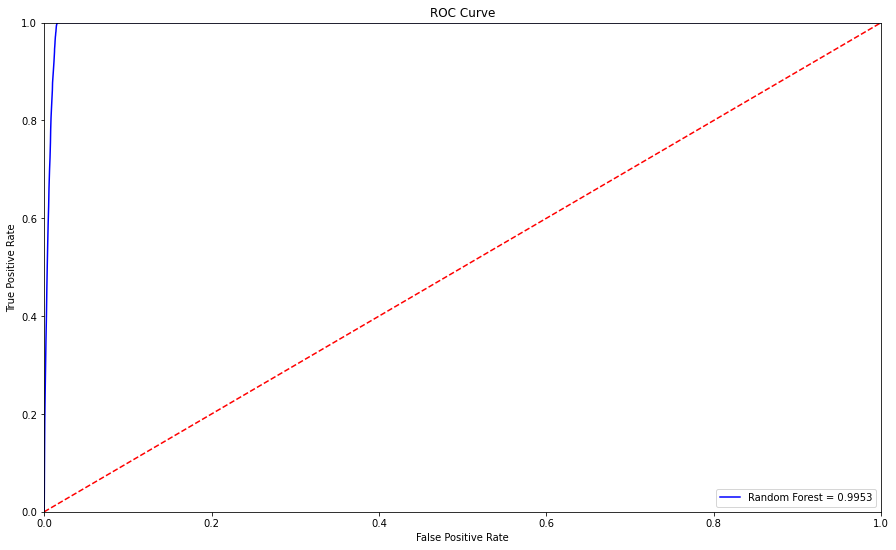

In [78]:
from sklearn.metrics import roc_curve, auc
probs = rf.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 9))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label=f'Random Forest = {roc_auc:0.4f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()